## OpenCV 전처리 모음

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

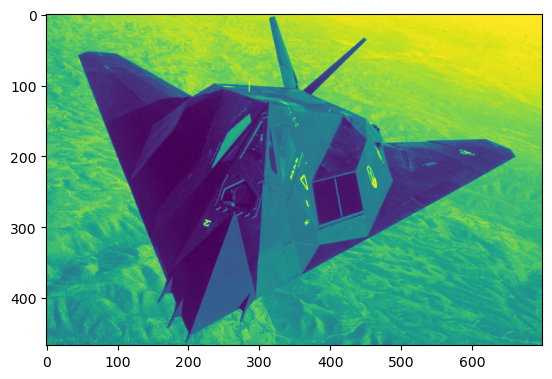

In [3]:
image = cv2.imread('F22Raptor.jpg', cv2.IMREAD_GRAYSCALE)
plt.imshow(image); plt.show()

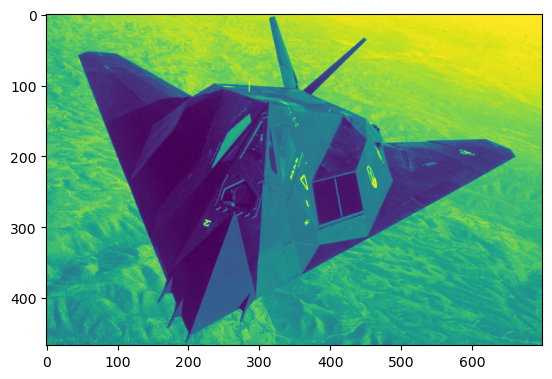

In [5]:
# 컬러
image_bgr = cv2.imread('F22Raptor.jpg', cv2.IMREAD_COLOR)
# RGB타입으로 변환
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(image); plt.show()

Text(0.5, 1.0, 'Resized Image')

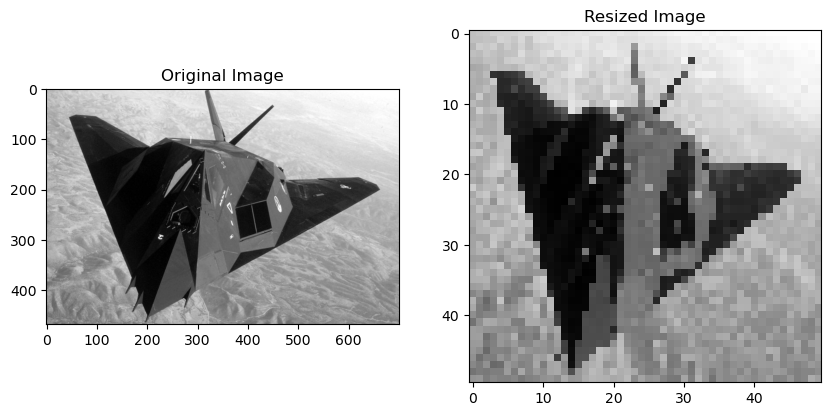

In [6]:
# 이미지 크기를 50x50으로 변경
image_50x50 = cv2.resize(image, (50, 50))

# 출력 
fig, ax = plt.subplots(1,2, figsize=(10,5))
ax[0].imshow(image, cmap='gray')
ax[0].set_title('Original Image')
ax[1].imshow(image_50x50, cmap='gray')
ax[1].set_title('Resized Image')

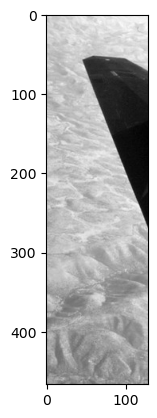

In [7]:
image_cropped = image[:,:128]

plt.imshow(image_cropped, cmap='gray')
plt.show()

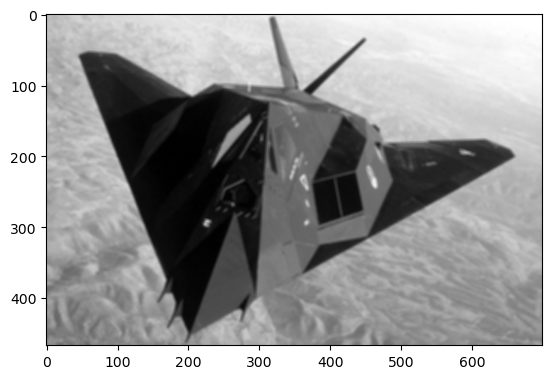

In [8]:
image_blurry = cv2.blur(image, (5,5)) # 5 x 5 커널 평균값으로 이미지를 흐리게 함 

plt.imshow(image_blurry, cmap='gray')
plt.show()

In [9]:
# 커널 생성 
kernel = np.ones((10,10)) / 25.0 # 모두 더하면 1이 되도록 정규화
kernel 


array([[0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04]])

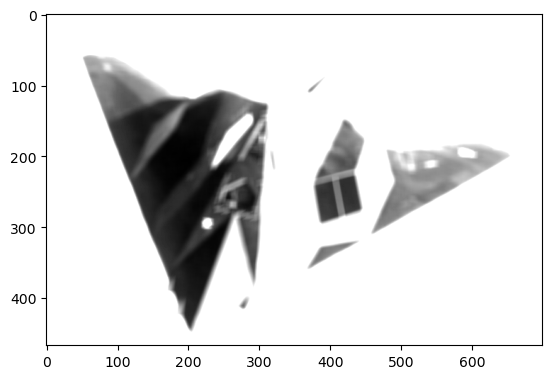

In [10]:
image_kernel = cv2.filter2D(image, -1, kernel)

plt.imshow(image_kernel, cmap='gray')
plt.show()

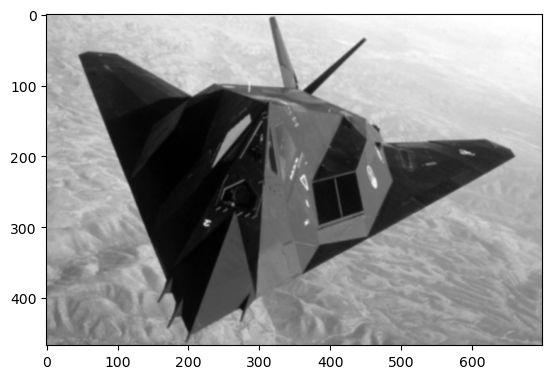

In [11]:
image_very_blurry = cv2.GaussianBlur(image, (5,5), 0) 

plt.imshow(image_very_blurry, cmap='gray')
plt.show()

Text(0.5, 1.0, 'Sharp Image')

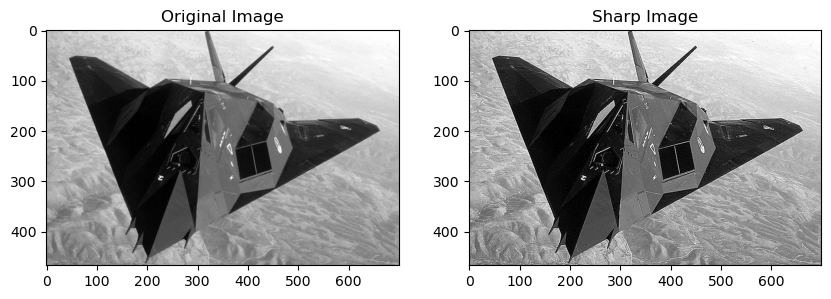

In [13]:
# 커널 생성(대상이 있는 픽셀을 강조) - 사프하게
kernel = np.array([[0, -1, 0],
                   [-1, 5, -1],
                   [0, -1, 0]])

# 커널 적용 
image_sharp = cv2.filter2D(image, -1, kernel)

fig, ax = plt.subplots(1,2, figsize=(10,5))
ax[0].imshow(image, cmap='gray')
ax[0].set_title('Original Image')
ax[1].imshow(image_sharp, cmap='gray')
ax[1].set_title('Sharp Image')

Text(0.5, 1.0, 'Enhanced Image')

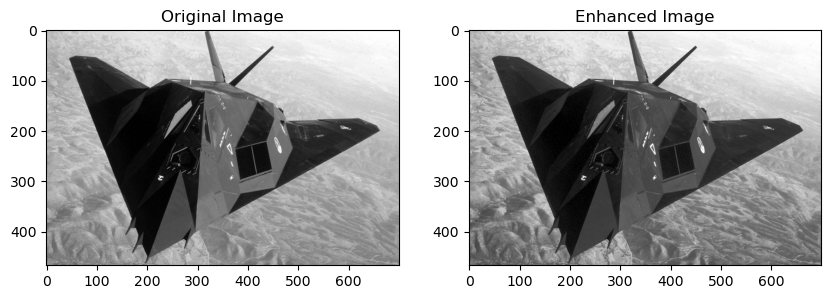

In [14]:
# 이미지 대비를 향상
image_enhanced = cv2.equalizeHist(image)

# plot
fig, ax = plt.subplots(1,2, figsize=(10, 5))
ax[0].imshow(image, cmap='gray')
ax[0].set_title('Original Image')
ax[1].imshow(image_enhanced, cmap='gray')
ax[1].set_title('Enhanced Image')

Text(0.5, 1.0, 'Enhanced Color Image')

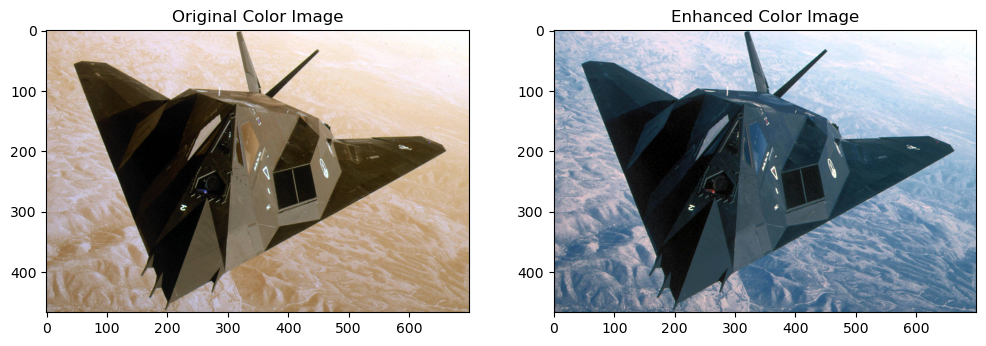

In [15]:
image_bgr = cv2.imread('F22Raptor.jpg')

# YUV 컬로 포맷으로 변환
image_yuv = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2YUV)
# 히스토그램 평활화 적용
image_yuv[:, :, 0] = cv2.equalizeHist(image_yuv[:, :, 0])
# #RGB로 변환
image_rgb = cv2.cvtColor(image_yuv, cv2.COLOR_YUV2RGB)

# plot
fig, ax = plt.subplots(1,2, figsize=(12, 8))
ax[0].imshow(image_bgr, cmap='gray')
ax[0].set_title('Original Color Image')
ax[1].imshow(image_rgb, cmap='gray')
ax[1].set_title('Enhanced Color Image')

In [17]:
image_bgr = cv2.imread('F22Raptor.jpg')
image_bgr.shape

(467, 700, 3)

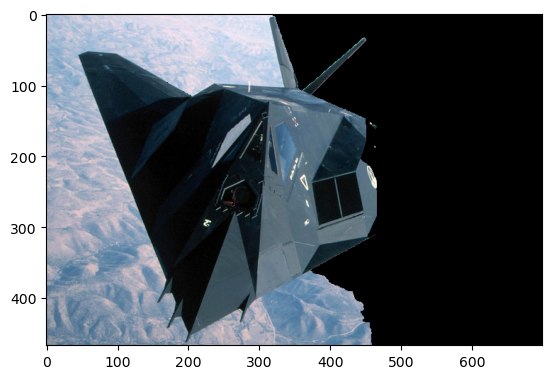

In [21]:
# 이미지 로드 후 RGB로 변환
image_bgr = cv2.imread('F22Raptor.jpg')
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
# 사각형 좌표: 시작점의 x,y  ,넢이, 너비
rectangle = (0, 0, 467, 700)

# 초기 마스크 생성
mask = np.zeros(image_rgb.shape[:2], np.uint8)

# grabCut에 사용할 임시 배열 생성
bgdModel = np.zeros((1, 65), np.float64)
fgdModel = np.zeros((1, 65), np.float64)

# grabCut 실행
cv2.grabCut(image_rgb, # 원본 이미지
           mask,       # 마스크
           rectangle,  # 사각형
           bgdModel,   # 배경을 위한 임시 배열
           fgdModel,   # 전경을 위한 임시 배열 
           5,          # 반복 횟수
           cv2.GC_INIT_WITH_RECT) # 사각형을 위한 초기화
# 배경인 곳은 0, 그 외에는 1로 설정한 마스크 생성
mask_2 = np.where((mask==2) | (mask==0), 0, 1).astype('uint8')

# 이미지에 새로운 마스크를 곱행 배경을 제외
image_rgb_nobg = image_rgb * mask_2[:, :, np.newaxis]

# plot
plt.imshow(image_rgb_nobg)
plt.show()

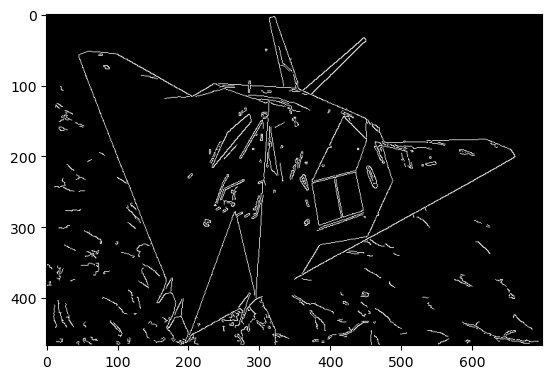

In [22]:
# 이미지 로드
image_gray = cv2.imread('F22Raptor.jpg', cv2.IMREAD_GRAYSCALE)

# 픽셀 강도의 중간값을 계산
median_intensity = np.median(image_gray)

# 중간 픽셀 강도에서 위아래 1 표준편차 떨어진 값을 임곗값으로 지정
lower_threshold = int(max(0, (1.0 - 0.33) * median_intensity))
upper_threshold = int(min(255, (1.0 + 0.33) * median_intensity))
# Canny edge detection 적용
image_canny = cv2.Canny(image_gray, lower_threshold, upper_threshold)

plt.imshow(image_canny, cmap='gray')
plt.show()

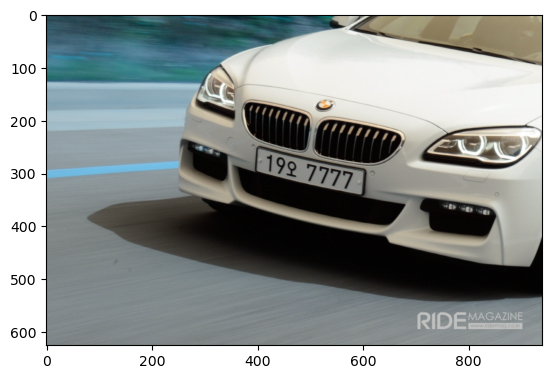

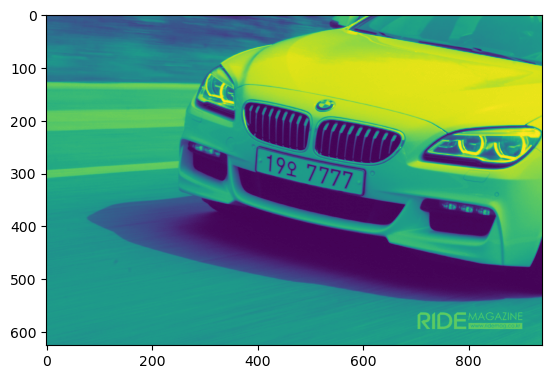

In [3]:
img_ori = cv2.imread('1.jpg')
plt.imshow(img_ori); plt.show()

gray = cv2.cvtColor(img_ori, cv2.COLOR_BGR2GRAY)
plt.imshow(gray); plt.show()

## Thresholding

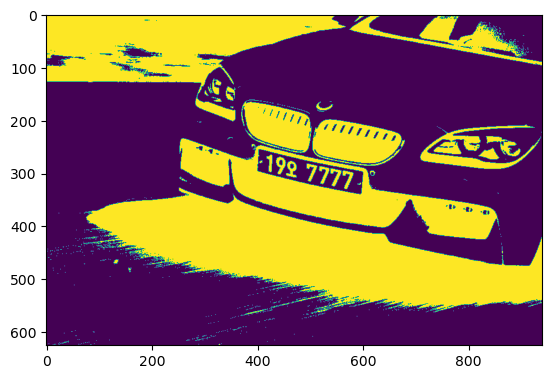

True

In [14]:
ret,img_thresh = cv2.threshold(
    gray,
    127,255.0,
    cv2.THRESH_BINARY_INV
)
plt.imshow(img_thresh); plt.show()
cv2.imwrite('2.jpg', img_thresh)

## AdaptiveThresholding

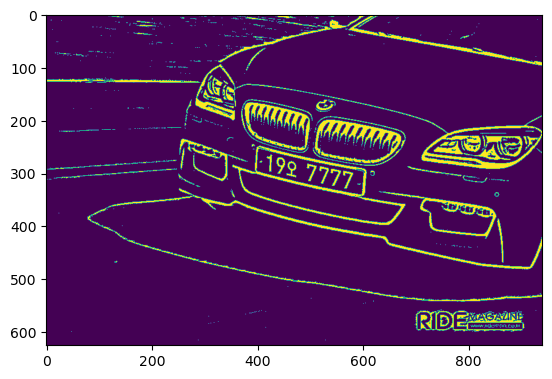

In [7]:
img_thresh = cv2.adaptiveThreshold(gray,
 maxValue=255.0,
 adaptiveMethod=cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
 thresholdType=cv2.THRESH_BINARY_INV, 
 blockSize=19,
 C=9)
plt.imshow(img_thresh); plt.show()

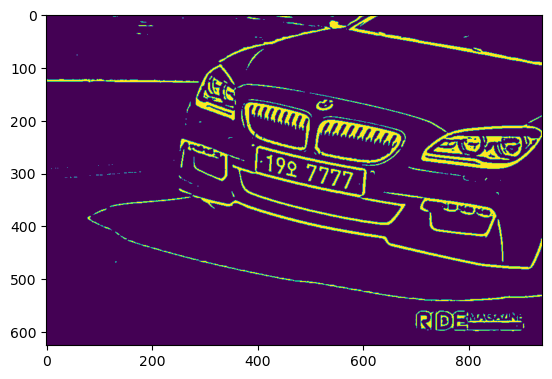

In [9]:
 img_blurred = cv2.GaussianBlur(gray, ksize=(5, 5), sigmaX=0)
 #gray : 입력 영상   
 #ksize : 커널 크기   
 #sigmaX : X 방향 표준편차. 값이 높을수록 이미지가 흐려짐
 
 img_blur_thresh = cv2.adaptiveThreshold(img_blurred,
   maxValue=255.0,
   adaptiveMethod=cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
   thresholdType=cv2.THRESH_BINARY_INV,
   blockSize=19,
   C=9)
plt.imshow(img_blur_thresh); plt.show()

In [12]:
img = cv2.imread('1.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

mser = cv2.MSER_create()
regions,_ = mser.detectRegions(img)

clone = img_blur_thresh.copy()

hulls = [cv2.convexHull(p.reshape(-1,1,2)) for p in regions]

remove1 = []
for i, c1 in enumerate(hulls):
    x,y,w,h = cv2.boundingRect(c1)
    r1_start = (x, y)
    r1_end = (x + w, y + h)

    for j, c2 in enumerate(hulls):

        if i == j:
            continue

        x, y, w, h = cv2.boundingRect(c2)
        r2_start = (x, y)
        r2_end = (x + w, y + h)

        if r1_start[0] > r2_start[0] and r1_start[1] > r2_start[1] and r1_end[0] < r2_end[0] and r1_end[1] < r2_end[1]:
            remove1.append(i)
            
for j, cnt in enumerate(hulls):
    if j in remove1: continue
    x, y, w, h = cv2.boundingRect(cnt)
    margin = 10
    cv2.rectangle(clone, (x - margin, y - margin), (x + w + margin, y + h + margin), (0, 255, 0), 1)
cv2.imshow('mser', clone)
cv2.waitKey(0)


-1